In [3]:
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

skincancer = pd.read_table('https://online.stat.psu.edu/onlinecourses/sites/stat501/files/data/skincancer.txt',sep='\s+')

# EDA and Data Preprocessing()

In [4]:
skincancer_Original = skincancer[:]

In [2]:
skincancer.shape

(49, 5)

In [5]:
skincancer.head()

,State,Lat,Mort,Ocean,Long
0,Alabama,33.0,219,1,87.0
1,Arizona,34.5,160,0,112.0
2,Arkansas,35.0,170,0,92.5
3,California,37.5,182,1,119.5
4,Colorado,39.0,149,0,105.5


In [6]:
skincancer.info() #No  MIssing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   49 non-null     object 
 1   Lat     49 non-null     float64
 2   Mort    49 non-null     int64  
 3   Ocean   49 non-null     int64  
 4   Long    49 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.0+ KB


In [7]:
skincancer.isna().sum() #METHOD2 Rechecking

State    0
Lat      0
Mort     0
Ocean    0
Long     0
dtype: int64

In [8]:
sum(skincancer.duplicated()) #No Duplicated Values

0

In [9]:
sum(skincancer['State'].value_counts() ) #All are Unique values present in the dataset for State Column

49

In [18]:
skincancer.astype('object').describe().transpose() #Ocean having only 2 uniuq values

,count,unique,top,freq
State,49,49,Delaware,1
Lat,49,32,39,5
Mort,49,40,117,3
Ocean,49,2,0,27
Long,49,46,71.5,2


In [12]:
#We can encode the Column Ocean as it is a binary Variable
skincancer['Ocean'].value_counts()

0    27
1    22
Name: Ocean, dtype: int64

In [17]:
skincancer.describe()

,Lat,Mort,Ocean,Long
count,49.000000,49.000000,49.000000,49.000000
mean,39.532653,152.877551,0.448980,90.936735
std,4.610874,33.428177,0.502545,14.866485
min,28.000000,86.000000,0.000000,69.000000
25%,36.000000,128.000000,0.000000,78.500000
50%,39.500000,147.000000,0.000000,89.500000
75%,43.000000,178.000000,1.000000,100.000000
max,47.500000,229.000000,1.000000,121.000000


In [35]:
#Which State having highest motality rate
print(skincancer[skincancer.Mort == skincancer.Mort.max()]) #Texas Having the highest Motality Rate

    State   Lat  Mort  Ocean  Long
41  Texas  31.5   229      1  98.0


In [44]:
#TOP 5 states having highest Mortality Rates
MortTop10=skincancer[['State','Mort']].sort_values('Mort',ascending=False).head(10)

In [46]:
MortTop10

,State,Mort
41,Texas,229
0,Alabama,219
9,Georgia,214
22,Mississippi,207
6,Delaware,200
31,NorthCarolina,199
8,Florida,197
26,Nevada,191
16,Louisiana,190
40,Tennessee,186


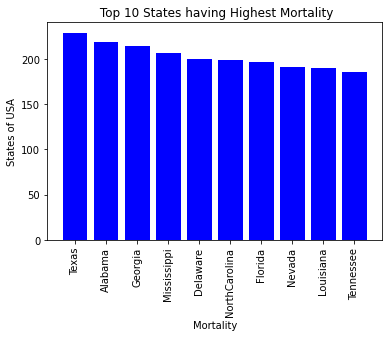

In [55]:
plt.bar("State", "Mort", data = MortTop10, color = "blue")
plt.xlabel("Mortality")
plt.xticks(rotation = 90) #To make States name Visibile not to overlap 
plt.ylabel("States of USA")
plt.title(" Top 10 States having Highest Mortality")
plt.show()

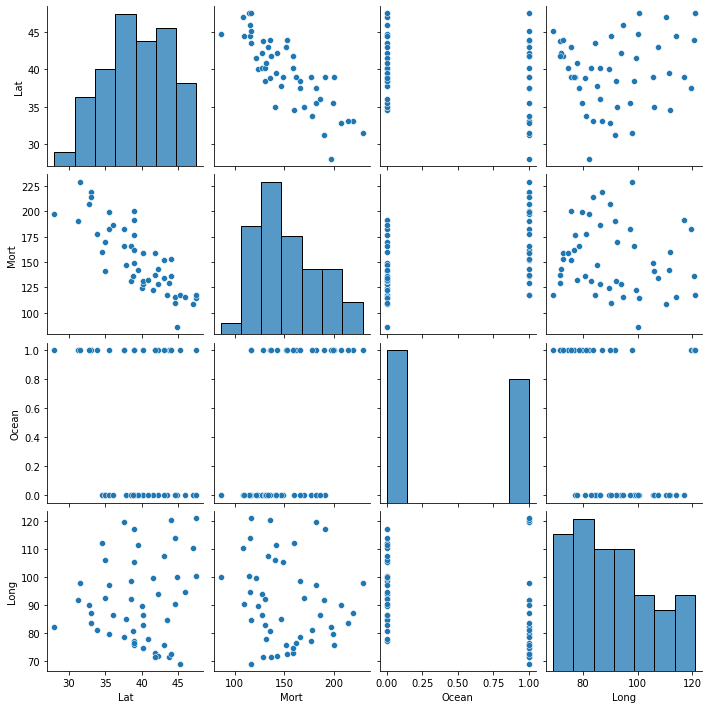

In [26]:
sns.pairplot(skincancer)

In [2]:
sns.boxplot( y=skincancer['Mort'] ) #No outliers

NameError: name 'sns' is not defined

In [1]:
sns.countplot(skincancer['Ocean'])
plt.title("Bar chart for Loan Status", y=1, fontdict={"fontsize": 20})

NameError: name 'sns' is not defined

In [90]:
skincancer.corr()

,Lat,Mort,Ocean,Long
Lat,1.000000,-0.824518,-0.219542,0.098974
Mort,-0.824518,1.000000,0.473355,-0.146188
Ocean,-0.219542,0.473355,1.000000,-0.382610
Long,0.098974,-0.146188,-0.382610,1.000000


<AxesSubplot:xlabel='Ocean', ylabel='Mort'>

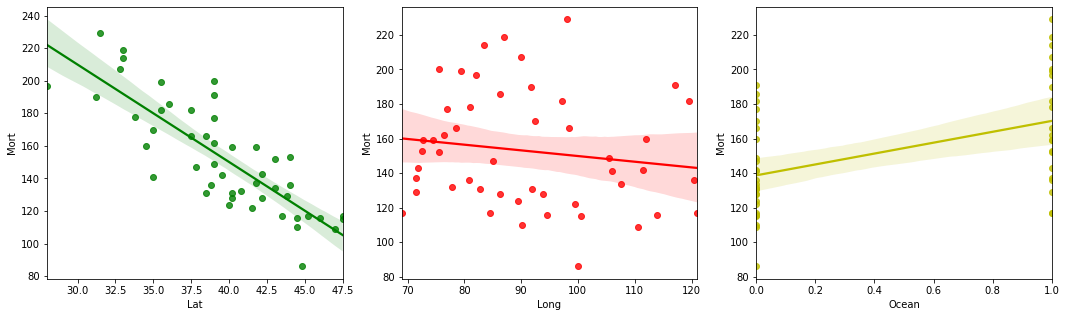

In [120]:
plt.subplots(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.regplot(x=skincancer["Lat"], y=skincancer["Mort"],color="g")
plt.subplot(1, 3, 2)
sns.regplot(x=skincancer["Long"], y=skincancer["Mort"],color="r")
plt.subplot(1, 3, 3)
sns.regplot(x=skincancer["Ocean"], y=skincancer["Mort"],color="y")

#We can see that Lattitude having negative Correlation with Mortality

In [14]:
#Encoding on Ocean Varibale and keep the First column 
df_skincancer = pd.get_dummies(skincancer,columns=['Ocean'],drop_first=True)

In [56]:
df_skincancer.head()

,State,Lat,Mort,Long,Ocean_1
0,Alabama,33.0,219,87.0,1
1,Arizona,34.5,160,112.0,0
2,Arkansas,35.0,170,92.5,0
3,California,37.5,182,119.5,1
4,Colorado,39.0,149,105.5,0


In [59]:
df_skincancer.drop(['State'],axis=1,inplace=True)

In [60]:
df_skincancer.head()

,Lat,Mort,Long,Ocean_1
0,33.0,219,87.0,1
1,34.5,160,112.0,0
2,35.0,170,92.5,0
3,37.5,182,119.5,1
4,39.0,149,105.5,0


In [58]:
#NORMALISATION --JUST APPLIED
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_standardised = pd.DataFrame(sc.fit_transform(df_skincancer), columns=df_skincancer.columns)
df_standardised.head()

,Lat,Mort,Long,Ocean_1
0,-1.431475,1.998544,-0.267550,1.107823
1,-1.102786,0.215275,1.431511,-0.902671
2,-0.993223,0.517524,0.106243,-0.902671
3,-0.445407,0.880223,1.941230,1.107823
4,-0.116718,-0.117199,0.989755,-0.902671


In [123]:
from sklearn.preprocessing import StandardScaler
X1 = df_skincancer.drop(['Mort'],axis=1)
y1= df_skincancer.Mort
standardised_X1 = StandardScaler()
X1_standardised = pd.DataFrame(standardised_X1.fit_transform(X1), columns=X1.columns)

In [80]:
X1_standardised.head()

,Lat,Long,Ocean_1
0,-1.431475,-0.267550,1.107823
1,-1.102786,1.431511,-0.902671
2,-0.993223,0.106243,-0.902671
3,-0.445407,1.941230,1.107823
4,-0.116718,0.989755,-0.902671


In [124]:
import statsmodels.api as sm
X2 = sm.add_constant(X1) 
ols = sm.OLS(y1,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   Mort   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     50.83
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           1.70e-14
Time:                        17:44:44   Log-Likelihood:                -204.75
No. Observations:                  49   AIC:                             417.5
Df Residuals:                      45   BIC:                             425.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        349.2369     27.060     12.906      0.0

In [125]:
maxp = lr.pvalues.max()
while(maxp > 0.05):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True) 
    ols = sm.OLS(y,X2)
    lr = ols.fit()
    maxp = lr.pvalues.max()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   Mort   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     76.83
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           2.17e-15
Time:                        17:47:54   Log-Likelihood:                -205.02
No. Observations:                  49   AIC:                             416.0
Df Residuals:                      46   BIC:                             421.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        360.6905     21.498     16.778      0.0

In [126]:
#NORMALISATION
from sklearn.preprocessing import MinMaxScaler
X = df_skincancer.drop(['Mort','Long'],axis=1)
y = df_skincancer.loc[:,['Mort']]
sc_X = MinMaxScaler()
X_scaled = pd.DataFrame(sc_X.fit_transform(X), columns=X.columns)


In [137]:
X_scaled.head()

,Lat,Ocean_1
0,0.256410,1.0
1,0.333333,0.0
2,0.358974,0.0
3,0.487179,1.0
4,0.564103,0.0


In [138]:
y.head()

,Mort
0,219
1,160
2,170
3,182
4,149


In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [140]:
y_train.head()

,Mort
2,170
46,136
18,162
15,147
28,159


In [141]:
#import Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [142]:
#train the model
model.fit(X_train,y_train)

LinearRegression()

In [143]:
model.intercept_ #b0

array([346.49848769])

In [144]:
model.coef_ #b1

array([[-5.27327485, 26.8434471 ]])

In [145]:
#predict y values
y_pred = model.predict(X_test)
y_pred

array([[161.93386802],
       [140.84076863],
       [140.84076863],
       [146.59111634],
       [ 96.01793242],
       [152.91904616],
       [159.2972306 ],
       [156.66059317],
       [140.84076863],
       [111.83775697],
       [135.56749378],
       [186.1406777 ],
       [134.51283881],
       [142.37249646],
       [119.74766924]])

In [146]:
#check the mean squared error between the predicted and true values on the test set
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y_test,y_pred)) # mae = mean(|y_pred - y_test|) #15 motality rates lower
print(mean_squared_error(y_test,y_pred)) # mse = mean[(y_pred - y_test)^2]

17.832697393942436
470.548789713214


In [147]:
#r^2 coefficient of determination

model.score(X_train,y_train)   #Training score

0.8535527471717307

In [148]:
model.score(X_test,y_test) 

0.38569228363017916

In [150]:
#plot best fit line
h = [[df_skincancer.Lat.min()],[df_skincancer.Lat.max()]]
w = model.predict(h)
plt.plot(h,w,color='red')
plt.scatter(df_skincancer.Lat,df_skincancer.Mort,color='blue')
plt.xlabel('LATITIUDE')
plt.ylabel('MORTALITY')
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)